In [15]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

#Carregando o dataset
hcc = pd.read_csv("encoded_hcc.csv", sep=",")

hcc.head()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,...,Varices_YES,Spleno_YES,PHT_YES,PVT_YES,Metastasis_YES,Hallmark_YES,PS,Encephalopathy,Ascites,Class_LIVES
0,67,137.0,15.000000,1.530000,95.000000,13.700000,106.600000,4.900000,99.000000,3.400000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,62,0.0,20.464286,1.421851,19299.951146,12.879012,95.119753,1473.961549,113206.442654,3.445535,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,78,50.0,50.000000,0.960000,5.800000,8.900000,79.800000,8.400000,472.000000,3.300000,...,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0
3,77,40.0,30.000000,0.950000,2440.000000,13.400000,97.100000,9.000000,279.000000,3.700000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,76,100.0,30.000000,0.940000,49.000000,14.300000,95.100000,6.400000,199.000000,4.100000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
def decision_tree(subdataset):
    # Carregamos um conjunto de dados
    X = subdataset.drop(columns = ["Class_LIVES"])
    y = subdataset["Class_LIVES"]

    # Dividimos os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializamos o classificador da árvore de decisão
    clf = DecisionTreeClassifier(max_leaf_nodes=8, criterion="gini", random_state=0)

    # Treinamos o classificador usando o conjunto de treinamento
    clf.fit(X_train, y_train)

    # Previsões no conjunto de teste
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

    # Precisão do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Acurácia:", accuracy)

    # Relatório de classificação
    print("Relatório de Classificação")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    print("Matriz de Confusão")
    print(confusion_matrix(y_test, y_pred))

    # Calcular e imprimir a AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC:", auc)

    # Plotar a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (área = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for DT')
    plt.legend(loc="lower right")
    plt.show()



Acurácia: 0.6363636363636364
Relatório de Classificação
              precision    recall  f1-score   support

         0.0       0.56      0.38      0.45        13
         1.0       0.67      0.80      0.73        20

    accuracy                           0.64        33
   macro avg       0.61      0.59      0.59        33
weighted avg       0.62      0.64      0.62        33

Matriz de Confusão
[[ 5  8]
 [ 4 16]]
AUC: 0.676923076923077


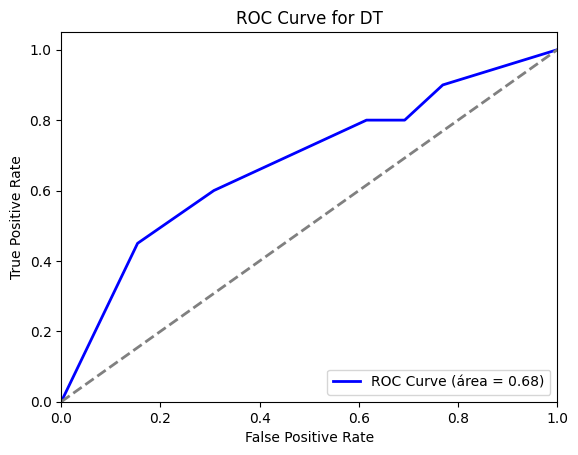

In [32]:
# Importe as bibliotecas necessárias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#dados do artigo que o prof passou
#subdataset = hcc[["ALP", "AFP", "Hemoglobin", " Albumin", "Ferritin","PS", "AST", "Class_LIVES"]]
#decision_tree(subdataset)

#dados obtidos na matrix de correlação > |0.20|
#subdataset = hcc[["Hemoglobin", " Albumin", "Iron", "Leucocytes", "INR", "Total_Bil", "Dir_Bil", "Ferritin", "ALP", "Class_LIVES"]]
#decision_tree(subdataset)

subdataset=hcc[['Hemoglobin','Iron',' Albumin','Sat','MCV','AFP','Ferritin','ALP', 'PS','Symptoms_YES','Ascites','Metastasis_YES','Encephalopathy','Class_LIVES']]
decision_tree(subdataset)



In [36]:
import pandas as pd
from tabulate import tabulate


results_data = {
    "Model": ["KNN", "Decision Tree"],
    "Accuracy": [0.85, 0.90],
    "Precision": [0.82, 0.88],
    "Recall": [0.87, 0.92]
}

results_df = pd.DataFrame(results_data)

# Converta o DataFrame para uma tabela formatada
table = tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False)

# Exibe a tabela formatada
print(table)


+---------------+----------+-----------+--------+
|     Model     | Accuracy | Precision | Recall |
+---------------+----------+-----------+--------+
|      KNN      |   0.85   |   0.82    |  0.87  |
| Decision Tree |   0.9    |   0.88    |  0.92  |
+---------------+----------+-----------+--------+
